## Supervised Learning Module

### Week 4 - Regression

### What is learning in Machine Learning?

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish: supervised, semi-supervised, unsupervised, and reinforcement learning.

When you are using step 3, that is only involved in supervised learning.

### What is Supervised Learning?

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$

### Formulation of regression problems

In regression problems the labels in the dataset are **numeric variables** of type int, float, taking **continuous** values. In other words they are not categoric variables. In statistics labels are called response variables. Maybe also be called: label, outcome, or target. or dependent variable.

Features may also be called: attributes, covariates, variables, predictors.

The rows will be called observations, N, samples, examples, instances.

In [52]:
from sklearn.datasets import load_boston # import function

boston = load_boston() # this gets the data out
X = boston.data # features 
y = boston.target # response variables # note that the labeles are also called targets

In [53]:
# !pip install --upgrade seaborn

In [54]:
X.shape   # how many examples, how many features in each feature vector? # number of features

(506, 13)

In [55]:
y.shape   # how many examples, how many features in each feature vector? # one dimensional, number of rows

(506,)

In [56]:
X[:3] # checking out the first 3 rows of the features.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [57]:
y.shape   # as many labels as examples

(506,)

In [58]:
type(y[:3]) # this is a numpy array

numpy.ndarray

In [59]:
%matplotlib inline

import pandas as pd
import seaborn as sns

d = pd.DataFrame(X, columns=boston.feature_names) #making this into a dataframe
d['y'] = pd.Series(y)

In [60]:
d.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'y'],
      dtype='object')

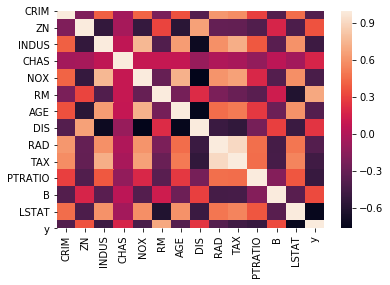

In [61]:
sns.heatmap(d.corr()) # you can put a semicolon at the end of this to get rid of the <> output. a jupyter only trick

If you could only pick one feature, you'd pick RM. (Highest correlation with R). If you can pick more than that, pick the ones most correlated with y... They will probably be the most predictive. Look for what stands out this most. In this case, LSAT and RM. In the pairplot, (a correlation matrix), you will see they also have the strongest looking scatterplots. (Looking across the bottom row).

In [62]:
# sns.pairplot(d) # this is taking a long time to run and plugging up the kernel. gonna skip it for the moment.

Note that some features could be categorical variables

In [63]:
d.columns[12]

'LSTAT'

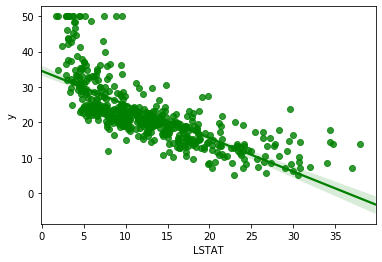

In [64]:
sns.regplot("LSTAT", "y", data=d, color="green"); #can always use shift tab to look at the default values ;) 
# originally this included, ci=None, but he decided he likes having the confidence interval so we deleted it.

Omg the green is so cute!

In [65]:
print(boston.DESCR) #description attribute shows us more about what the features are.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

As you  can see from above, there are 14 attributes.  The last one, median value of the house, is usually the target (e.g., what we are trying to predict.)

### Machine Learning methods to solve regression problems

We will consider the following methods in this class:

- Linear Regression
- Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting

Various regularization techniques for regression: Ridge, LASSO regularization will be considered in the next class. ~ These help prevent overfitting which is the model memorizing the data by heart including the noise. Overfitting hurts performance on future data. Ridge and LASSO help with that by adding a penalty the model has to try to minimize. (we will discuss this in more detail in the future).

Other methods capable of both regressions and classification we will consider in the classification class.

Neural networks will be considered in Deep Learning module.

### Note: We are doing regression because the variable (median value) is continuous. If it were categorical, we would be doing classification.

### Linear regression and closed form solution

We want to build a model, which is a function with intercepts & weights (coefficients) $$f_{w, b}(x) = wx + b$$

so that it would predict us the label given new data $$y = f_{w,b}(x_{new})$$




We can formulate the training process as a linear algebra (matrix computation) problem:

$$ y=w^TX + b$$

$ w $ are the parameters of the model that we are trying to **learn** in the **training** process.

For $b=0$, $w$ could be solved with:

$ w = (X^TX)^{-1}X^Ty $

This minus one is the inverse. 

However, that finding the inverse $(X^TX)^{-1}$ matrix may not be always possible.

When we say model or algorithm, these are just functions. It takes an input and gives you an output.

In [66]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T@X)@X.T@y # see here, we are getting coefficients (weights), one for each feature/column

w.shape # the 14th column is y, so it is not included

(13,)

In [67]:
import numpy as np
# calculate coefficients using closed-form solution. SAME THING AS  ABOVE, BUT WITH DOT FUCTION. MARTIN PREFERS @.
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 

w.shape

(13,)

In [68]:
w #taking a look at the weights (betas, coefficients) 

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

**Loss function** measures how good we predict each example. Squared error is commonly used.

$$ SE = (f_{w,b}(x_i)- y_i)^2$$
can be re-written as: $$ SE = (\hat y- y_i)^2$$

for example $i$.

The above looks a little complicated. The f(w,b) part is just standing for our function with the weight and intercept. It receives a vector of x's. Gets X at each point until x-sub-n. Lol bro it's literally just standard error. A simple form of assessing how well the model is forming.
Mathematically, we square in order to not worry about negative/positive differences cancelling each other out.

In [69]:
i = 80
b = 0 
se = (w.T.dot(X[i]) + b - y[i])**2
se

0.46685390150644945

**Cost function** is loss function for all the training examples. We will use Mean Squared Error
$$ MSE = \frac{1}{N}\sum_{i=1..N}{(f_{w,b}(x_i) - y_i)^2} $$

$$ MSE = \frac{1}{N}\sum_{i=1..N}{((wx_i + b) - y_i)^2} $$ (rewritten with our function)

Notice that  it's  just the same thing, but added for each observation, summed and divided by N. (Sum of squared errors,  sum of squares).

## Optimization

We can find the parameters $w$, $b$ that minimize **cost function** by solving an optimization problem. One such method is gradient descent method.

### Gradient descent method
Gradient shows direction towards the minimum:
$$ \frac{dMSE}{dw} =  \frac{1}{N}\sum_{i=1..N}{-2x_i(y_i - (wx_i + b))} $$

$$ \frac{dMSE}{db} = \frac{1}{N}\sum_{i=1..N}{-2(y_i - (wx_i + b))}$$


By updating $w$ and  $b$ over multiple iterations we converge to the optimal values.
We can control the rate of convergence $\alpha$

$$ w_{updated} = w_{previous} - \alpha\frac{dMSE}{dw} $$

$$ b_{updated} = b_{previous} - \alpha\frac{dMSE}{db} $$

Iterative process, slowing converging.
Rate of convergence, you can adjust, also called the learning rate. Trying to see if each point is lower, than the last point. Is MSE going down? If yes, going in right direction. 

You can now implement linear regression with gradient descent. Rate of convergence $\alpha$ is a hyperparameter.
Gradient descent will allow to use any cost function for which we can express its derivative. Think about other cost functions.

Can you identify by looking at the cost function that normalization of data is critical for Linear Regression or not?

### Sklearn implemenentation



Notice it follows the 4 steps of all sklearn.
- import
- instantiate 
- fit 
- predict
- score

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
# init
lr = LinearRegression(fit_intercept=False)

In [72]:
# Learning
lr.fit(X, y) # the fit method returns the model itself, so we can see the settings

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Notice that after learning the model, there are a lot more method options with .shifttab. 

In [73]:
# Learned model w and b:
lr.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [74]:
lr.intercept_ #this is 0 bc we set fit intercept to false.

0.0

In [75]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [76]:
w == lr.coef_ #rememberto use is close

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [77]:
np.isclose(w, lr.coef_)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

most the time u want default settings for linear regression. we only  set intercept to false so we could make this comparison to the matrix weights (w). just to show the weights and the coeff are the same. otherwise u will never set the intercept to false. and never use numpy to do linear regression. just a demonstration to show the math.

In [78]:
lr.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)>

In [79]:
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)

0.7137381380515405

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "predictions" based on the training dataset
y_model = lr.predict(X)  # f(x)
r2_score(y, y_model)  # MSE

0.7137381380515405

71% = fairly good. ppl like r squared bc easy to understand, but martin says there are better metrics for model performance. 

below we are creating a vector whch just has tthe averages repeated.

In [81]:
[1] * 3 #repeats the value, in side the list, however many times, and give u back a list. 

[1, 1, 1]

In [82]:
y_avg = [np.average(y)]* len(y) # average repeating a certain  number of times. the nnumber is the length  of y.

In [83]:
mean_squared_error(y, y_avg) # hard to interpret bc not in the same units as y.so  to  get it back down...sq rt. :)

84.41955615616556

Null  model (for regression):
- Always predicts the average of y
- Does not use any information on the features

Null model (for classification):
- always predict the mode of y values
- does not use any info on features

Why  we care
- not smart model, we expect it to be wrong. but the reason why is we want another point of reference. for ex, for MSE. we need a perfect model, which would have an MSE of 0. the null model. in our case, the null model is 9.19. and then our model: 4.92. so these are 2 pts of ref. the perf  would have 0 error, our model is not perf, but it's better than the null model.

points of reference (mse): 
- perf model = 0
- null model = 9.19
- our model = 4.92 

you can also refer to r-squared.
- perf model = 1
- null model = 0 
- our model = .72

In [84]:
r2_score(y, y_avg)

0.0

In [85]:
r2_score(y, y_model)

0.7137381380515405

In [86]:
np.sqrt(mean_squared_error(y, y_avg))  # RMSE root mean squared error. not i ncluded in scikit learn,must use np

9.188011545278203

In [87]:
np.sqrt(mean_squared_error(y, y_model))  # RMSE

4.915902697381885

### Making predictions on new data

In [88]:
# x_new = X[100] * 0.01*np.random.random()  # new example

x_new = np.array([0.01]*13)
print(x_new)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [89]:
w = lr.coef_ #doing again what we did before
b = lr.intercept_
y_new = np.dot(w, x_new) + b # these are our new predictions
y_new

0.042578503213361665

In [90]:
# or simply: another way to do this
# lr.predict(x_new.reshape(1, -1))
lr.predict([x_new, ])

array([0.0425785])

### How data normalization effects linear regression

In [91]:
x = 5

In [92]:
x *= 5; x

25

In [93]:
x = x * 5;x

125

In [94]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

In [95]:
median_absolute_error(y, y_model) # mean absolute error will be more sensitive to outliers. so median fixes that.

2.1900884748503557

In [96]:
mean_absolute_error(y, y_model)

3.286733578961558

In [97]:
from sklearn.preprocessing import normalize

X_copy = X.copy() # we are making a copy, to mess around with X, just for illustrative purposes
X_copy[5] *= 1000000
X_copy[4] *= 0.000001
X_copy[12] *= 0.0001
y_model = LinearRegression(fit_intercept=False).fit(X_copy, y).predict(X_copy)
mean_squared_error(y, y_model) # here you can see, the MSE is much higher bc of the crazy data

109.68635099566367

In [98]:
X_norm = normalize(X_copy)
y_model = LinearRegression(fit_intercept=False).fit(X_norm, y).predict(X_norm)
mean_squared_error(y, y_model) # by normalizing it, you are helping the error be more realistic

21.6410630103583

In [99]:
mean_absolute_error(y, y_avg) #taking the absolute value of the error, instead of squaring.

6.647207423956008

In [100]:
median_absolute_error(y, y_avg) # see median is less skewed than mean squre rror.

4.732806324110676

### How outliers affect linear regression?

### Regression with Nearest Neighbors
How do we find nearest neighbor?

How many nearest neighbors?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png)

In [101]:
X[0].shape

(13,)

In [102]:
X.shape

(506, 13)

## Distances
-  euclidean distance = the distance between a and b is the hypotenuse of the triangle
- manhattan distance = you can only move perpendicular, the distance is b + h of the triangle

In [103]:
from scipy.spatial.distance import euclidean

euclidean(X[0], X[1])

58.955079696240766

In [104]:
from scipy.spatial.distance import minkowski

euclidean(X[0], X[1])

58.955079696240766

In [105]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [106]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [107]:
# distances to 3 closest neighbors
distances

array([[ 0.        , 16.0970999 , 16.99995447],
       [ 0.        , 15.39261599, 18.97631935],
       [ 0.        ,  8.07879279,  8.89317332],
       ...,
       [ 0.        ,  3.94748354,  9.40019876],
       [ 0.        ,  3.94748354,  8.83081803],
       [ 0.        ,  4.2784823 ,  9.31201061]])

In [108]:
# indices of 3 closest neighbors (this is the index of them - e.g.number order. the 3 nearest neighbors 
# are the 0st, 241st, and 62nd are neighbors
indices

array([[  0, 241,  62],
       [  1,  47,   2],
       [  2,  85,  87],
       ...,
       [503, 504, 219],
       [504, 503, 219],
       [505, 502, 504]], dtype=int64)

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [109]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

# Task! Try it out! 
## Run the model, and decide: what is the optimal K? 
This is hyperparameter tuning.
Below  first we import, instantiate, and fit the model.

In [110]:
from sklearn.neighbors import KNeighborsRegressor

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

We decided we want to try this by running a for loop, where we test every option for K from 1 to 50, and create a delta variable where we track the change of RMSE, to see if we are getting bigger or smaller errors as K increases. Martin says, there is a option in scikitlearn that does something similar to this, called GridSearchCV. He says this is the perfect, best build-in way to do this in scikit-learn. BUT, we will write a loop together. :)
- he says, if we were running tuning of 2, 3, 4, 5, + hyperparameters, than we absolutely would not want to use a for loop, because for every hyperparameter we would need to nest our for loops. it'd be a mess. nested for loops are a mess. a better way would be GridSearchCV. ! :)

- one thing we could do is use the score  method for  our model - nnr.score() - which gives  back r-squared. However, instead we decided to use RMSE as our error method. So, this  means that first we need to get predictions out of our model. So what we do first is, instantiate the model (specify number of neighbors and other hyperparameters). We also fit the model, and then predict from the model. We do this all in one line using Python chaining. 
- 

In [111]:
scores_notrain = [] #initialize an empty list. for each K in a range from 1-50, 
            #within the loop, we will append the score (RMSE) for each K to this empty list of scores
    
for k in range (1, 51):
    y_pred = KNeighborsRegressor(n_neighbors = k).fit(X, y).predict(X)
    scores_notrain.append(mean_squared_error(y, y_pred)) 

In [112]:
scores_notrain

[0.0,
 12.133522727272727,
 17.993904259991215,
 20.731960227272726,
 23.966862450592888,
 25.983960803689065,
 27.93639953214487,
 30.225424592391306,
 31.326588835212025,
 33.21864525691699,
 34.72401806422107,
 36.59143815876153,
 37.36071345042917,
 37.87718490360571,
 38.48070900307422,
 39.22168895133399,
 39.62195597467073,
 40.60532498902064,
 41.8401754021,
 43.09623972332016,
 43.993925367248345,
 44.950134093359026,
 45.77828070712882,
 46.15186474116162,
 46.63272505928854,
 47.35107689968893,
 47.94309883591688,
 48.26142758832782,
 48.50683265733904,
 49.34539187527448,
 50.0262889036042,
 50.518020859066205,
 50.86974088713219,
 51.434211811206694,
 52.04600698556102,
 52.22716351315083,
 52.87391946748586,
 53.24058007510976,
 53.692322816536866,
 53.93648589426877,
 54.495244443242655,
 54.931876204368436,
 55.31606569730032,
 55.56691462777252,
 55.97054357097545,
 56.27768441275581,
 56.524172841251286,
 56.62581695864899,
 56.843056927861085,
 57.070772086956524]

Okay, time for an explanation. 
As you can see, the least error is 0... when K = 1. This is really surprising because in the real world, K would pretty much never be 1! 
The reason we are seeing this is because we didn't split the data into a train-test split. When the data is testen the same values it was trained on, the model knows all of the values (stores all the values) because it needs those to make predictions. When K = 1, all the model does is look up the value it already knows, and makes that it's prediction lol. So, K will = 1, it's a perfect model, because the model already knows what it is being tested on. 
So to fix this... we will go back and split!

In [113]:
from sklearn.model_selection import train_test_split
# now we run this. it will give us output: x train, x test, y train and y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# so to amend the  for loop... we need to fit the model on our train sets for X and y both. 
# for our error, we need to compare our predictions of y to our test set for y. and predict X_test.
# you come up with predictions based on the features of the training set (e.g., X).
# and then you compare what you get out of that model, (predictions for  the y's), with the TRUE y-values
#(e.g., y_test) to get your estimate of how well the model works.

Martin wants to tell us a little bit about the train-test split function. He says: 
obviously x and y are our features and labels. Test size is what % of the data is for the test (33%, with 66% for training). Random state means that it is random but producible. This means, even though train test split is always random sampling from our data set, it means that we will always get the same random sample each time. 
notice that if you were to run `X_train[:3]` in the same block as above, and run it again and again and again (re-splitting the train set and checking it out), each time you would get the same array as output. If you change random state to something else (ex: 123) yoou will get the same array again and again. You can pick anything you want. If you don't provide a random state, you'd get a different number every time. Don't do that, that's chaos! We want it to be reproducible. :) 

In [114]:
scores = [] #initialize an empty list. for each K in a range from 1-50, 
            #within the loop, we will append the score (RMSE) for each K to this empty list of scores
    
for k in range (1, 51):
    y_pred = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train).predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred)) 

In [115]:
scores

[44.078263473053894,
 35.41426646706587,
 29.192468396540256,
 30.35323353293413,
 32.17596886227545,
 32.21951430472387,
 35.400140535256014,
 36.48661395958084,
 38.175226583869296,
 38.86294730538922,
 40.28966991636562,
 40.19590444111776,
 41.08278212805159,
 42.42049065135037,
 43.12503925482368,
 43.55664460142216,
 43.25726042724241,
 44.33237709765654,
 44.30692636886891,
 45.73647874251497,
 47.23988648553233,
 47.92056960459247,
 48.30973750042449,
 49.29450006237525,
 50.465977293413175,
 51.057141604365235,
 51.4839297536614,
 52.14423851277037,
 52.21616830548179,
 52.45880751829674,
 52.39909188906266,
 52.63623502994012,
 52.665835601524215,
 52.656286958954055,
 52.599059024807524,
 52.11290178901454,
 52.52619487103222,
 52.842530810954266,
 52.80691114811796,
 52.87866729041915,
 53.00072102077819,
 53.50771433323829,
 53.31332139398865,
 53.65468726802592,
 53.64321351371331,
 53.796043065098544,
 53.74167664670658,
 54.2699219009897,
 54.36575341611653,
 54.6649284

Yay, now as you can see, K = 1 is actually pretty dang bad! It turns out K = 3 looks the best. Let's turn this into a plot. What we can do is change it into a series, and then make that into a line plot.

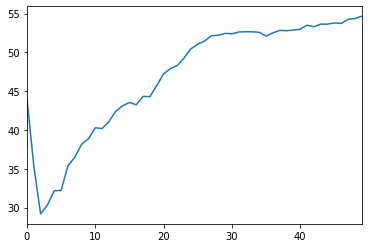

In [116]:
pd.Series(scores).plot.line(); # ta - dah!

What is the model in case of Nearest Neighbors?

In [117]:
y_pred_nn = nnr.predict(X)

In [118]:
varname = d.columns[12]

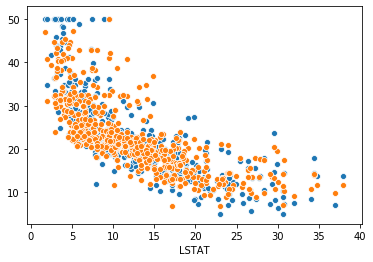

In [119]:
sns.scatterplot(d[varname], y)
sns.scatterplot(d[varname], y_pred_nn)

by the way, this plot it just showing you the predictions you made and then the real y-vals. nice! but doesn't tell you that much.

In [120]:
nnr.score(X, y)

0.7868514704495158

Notice how KNN handles nonlinearity!

Also, what does NNR(n_neighbors=1) mean?

In [121]:
indices = np.random.randint(2, size=X.shape[0]).astype(bool)
# indices

In [122]:
#np.logical_not(indices)

61.20696091348266

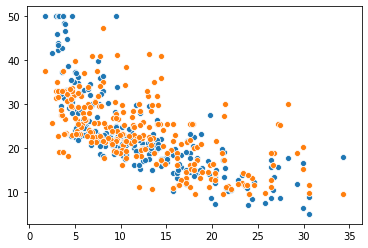

In [123]:
X_train = X[indices]
X_test = X[np.logical_not(indices)]
y_train = y[indices]
y_test = y[np.logical_not(indices)]

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

sns.scatterplot(X_test[...,12], y_test)
sns.scatterplot(X_test[...,12], y_pred_nn)

mean_squared_error(y_test, y_pred_nn) 

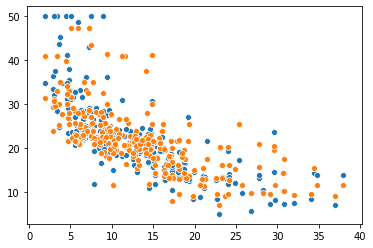

In [125]:
sns.scatterplot(X_train[...,12], y_train)
y_pred_nn_train = nnr.predict(X_train)
sns.scatterplot(X_train[...,12], y_pred_nn_train)

What are the main hyperparameters of KNN Regressor?
- distance metric
- K

# K-Nearest Neighbors Summary
## what does it do?
Steps: 

- 1) Uses the features of the training set (the values of the variables) to calculate distance from each training set observation (each known observation) to an unknown observation in the test set. This is how it finds the K nearest neighbors. These are the k-points with the shortest distances. (In our example, k =3 so it finds the 3 points with the shortest distance.)

- 2) Finds the K nearest neighbors from the training set. For these three observations, I have all of the info about their predictors, and also what their outcome is.

- 3) Now, taking what I know about the 3 nearest neighbors, I want to make a prediction about the outcome of my unknown observation. What I'll do is, use some specified method among my neighbors (average? most frequent? YOU decide) to make a prediction about what my unknown observation's outcome is. 
    - When would you do one or another?
    - Mean = use mean if there are continuous variables. ~ regression.
    - Mode = use mode if there are dichotomous variables. ~ classification. 


If: K = 1, this means it takes only one neighbor. There's nothing to average/mode out, so it just will take the neighbor's label as the prediction. E.g., the neighbor's label is the prediction. 

If: K = N, it takes all other values as the nearest neighbors. Everybody in the world is a neighbor! This results in giving us the null model, where the model is always predicting the average of y, for every single prediction of y.

### Normalization
Should you always normalize for KNN?
It's a good idea because we're calculating distances, which means the scaling can really affect those calculations. :) 

For tree-based models, normalization is not as important.

### Rule-based model:
Regression with decision tree

How a tree is built?

Hyperparameters: tree depth, cutoff

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
# Instantiate regression model
dtr = DecisionTreeRegressor(max_depth=5)

In [143]:
# Fit
dtr.fit(X_train, y_train)
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [144]:
# Predict
y_predicted = dtr.predict(X_test)


In [145]:
# Test
np.sqrt(mean_squared_error(y_test, y_predicted))

5.260476249621423

# Try it Out! - Class Exercise on Tuning Hyperparameter - Max Depth

try out: for loop, testing out all possible values of max depth trying to find best root mean squared error.

In [148]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

In [183]:
bestmax = []
for d in range(1,21):
    y_predicted = DecisionTreeRegressor(max_depth=d).fit(X_train, y_train).predict(X_test)
    bestmax.append(mean_squared_error(y_test, y_predicted))

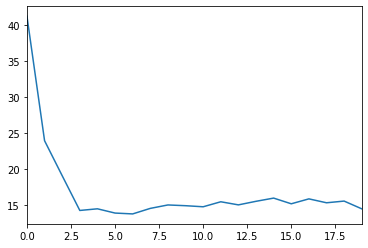

In [184]:
pd.Series(bestmax).plot.line();

In [185]:
bestmax # here's a list

[41.16706319103681,
 23.95389655383722,
 19.112151103427895,
 14.310603946649286,
 14.538972988575132,
 13.950182273655162,
 13.832266555563866,
 14.59736264340784,
 15.071538390565806,
 14.96829032779496,
 14.819780659514304,
 15.512166916167663,
 15.082064206281316,
 15.576596872920822,
 16.01953592814371,
 15.232694610778442,
 15.912874251497005,
 15.372634730538925,
 15.606706586826345,
 14.536167664670659]

In [188]:
bestmax.index(min(bestmax)) # here  we can  check the index of the min value. remember  pythn uses  0-indexing.

6

# here is code to make a table of the grid search results:

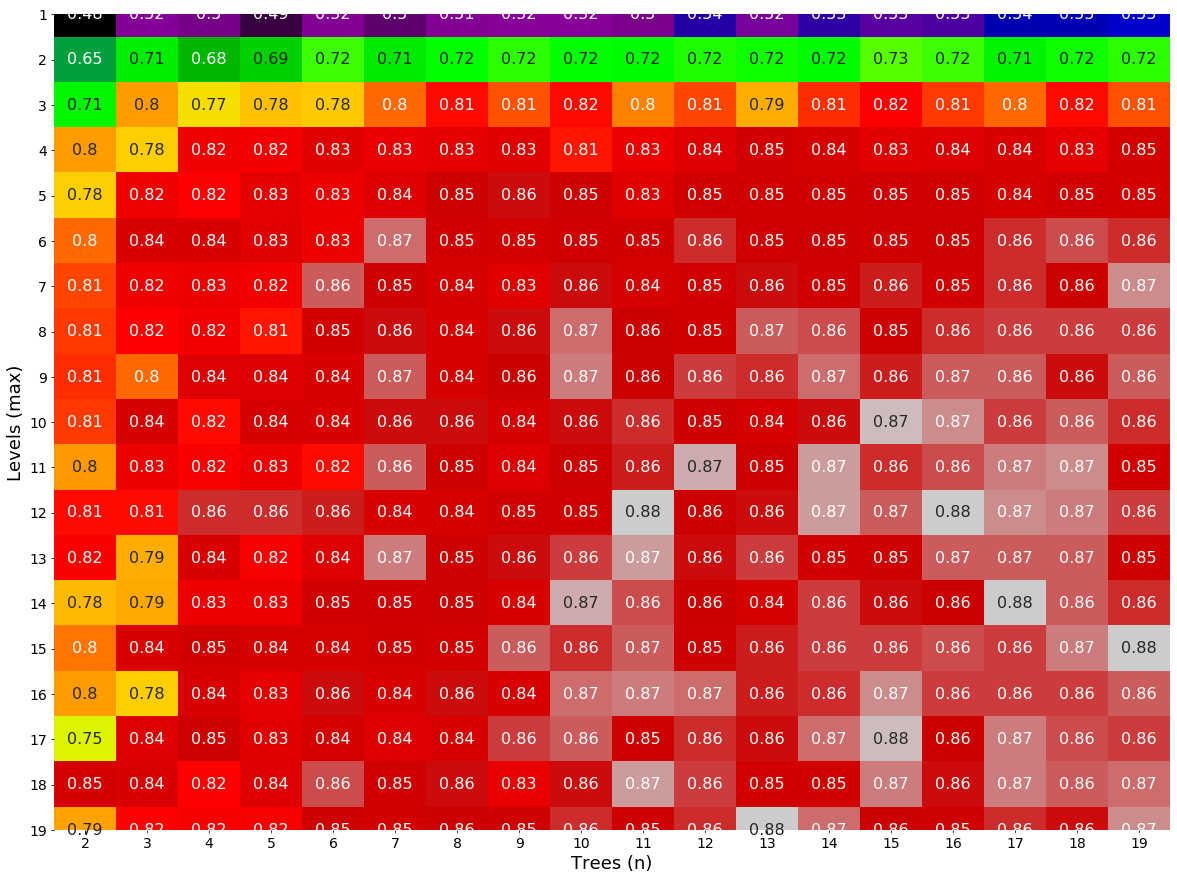

In [191]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 20), "n_estimators": range(2, 20)}, 
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

# Create a heatmap-style table
pivoted_df = cv_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
pivoted_df.style.background_gradient(
    cmap="nipy_spectral",
    axis=None
)

# Or create a heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(pivoted_df,
            cmap="nipy_spectral",
            cbar=False,
            annot=True,
            annot_kws={"size": 16})
plt.xlabel('Trees (n)', size=18)
plt.ylabel('Levels (max)', size=18)
plt.xticks(size=14)
plt.yticks(rotation=0, size=14);

On the bottom is the number of trees - in random forest you have multiple trees (if n = 1, you'd just have 1 decision tree lol). Y is max depth.
From this you'd probably go with a max depth of 6 and 7 trees. Pick  the lowest N's that give you a good result. :) 
For random forest, most important is max depth and number of trees.

## For more than 2 hyper parameters
use df.pivot_table() instead of df.pivot() and pass lists for the index and columns arguments. The code below takes a while to run, but it can give you a good idea of performance changes with different hyperparameter values.

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 20),
     "n_estimators": range(2, 20), 
     "min_samples_leaf": range(1, 6),
     "min_samples_split": range(2, 10)},
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Create a heatmap-style table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

### Ensemble methods

collection of weak (poor performing) models makes a strong and robust model

### Ensemble methods: bagging - Random Forest

![](https://dsc-spidal.github.io/harp/img/4-5-1.png)

Features:
    - sampling of training examples with replacement
    - subsampling the features
    - shallow trees

In [160]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.918512295081968

### Ensemble methods: boosting - Gradient Boosting
Sequential improvement of models by training on their errors

![](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png?w=992)

See also: http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html


In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
gbr = GradientBoostingRegressor()

In [161]:
# Fit 
gbr.fit(X_train, y_train)

# Predict
y_predicted = gbr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

12.666934741997123

### Homework assignment